In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [4]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Socio_features_with_clusters.csv")

In [5]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [8]:
cat_cols = user_profile.select_dtypes(include='object').columns

In [9]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [11]:
user_profile["H_3_Cluster"].value_counts()

0    1325
1    1000
2     591
Name: H_3_Cluster, dtype: int64

<AxesSubplot:ylabel='H_3_Cluster'>

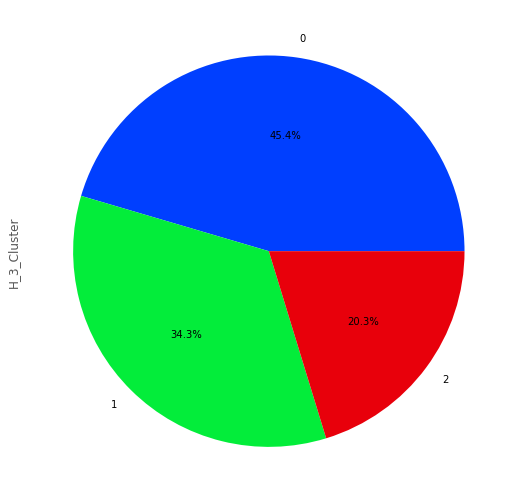

In [12]:
user_profile["H_3_Cluster"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

# Cluster analysis - Cluster 2

In [13]:
cluster_2 = user_profile[(user_profile["H_3_Cluster"]==2)]

In [14]:
cluster_2.describe()

,OFFNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,ONNET_OUTGOING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,IDD_outgoing_Cumulative_Revenue,PEO_TV_Scaled,BB_Scaled,BIRTH_YEAR,...,Peo_Packages_if_Kids,Peo_Packages_if_Teenager_Students,Peo_Package_if_Working_Professionals,VAS_if_Kids,VAS_if_Teenager_Students,VAS_if_Working_Professionals,IDD_if_Family_Member_Abroad,KMOD_3_Cluster,H_3_Cluster,H_5_Cluster
count,591.000000,550.000000,575.000000,559.000000,226.000000,0.0,0.0,13.000000,21.000000,408.000000,...,591.0,591.0,591.0,591.0,591.0,591.0,591.0,591.0,591.0,591.0
mean,0.094884,0.090569,0.077946,0.075274,0.036010,NaN,NaN,0.624038,0.279266,1962.149510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
std,0.082348,0.084624,0.080169,0.074978,0.060521,NaN,NaN,0.262200,0.197333,14.710965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.001202,0.001202,0.001202,0.001202,0.002500,NaN,NaN,0.050000,0.059028,1920.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
25%,0.022775,0.023204,0.015968,0.016201,0.003333,NaN,NaN,0.543750,0.128472,1952.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
50%,0.078174,0.067344,0.048077,0.047537,0.010000,NaN,NaN,0.712500,0.244792,1963.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
75%,0.142011,0.131758,0.118475,0.115789,0.044958,NaN,NaN,0.806250,0.277778,1973.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
max,0.449936,0.443387,0.481799,0.357511,0.440667,NaN,NaN,0.918750,0.809028,1996.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


#### Exceptional (Outlier Usage)

<AxesSubplot:>

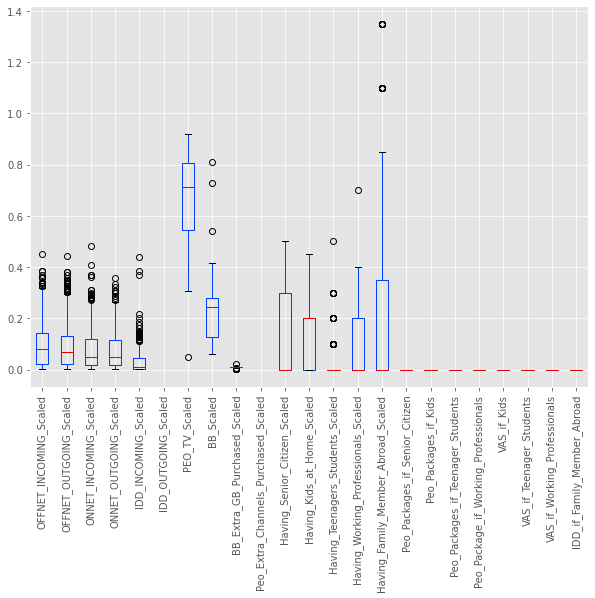

In [15]:
cluster_2.select_dtypes(include='float64').drop(["IDD_outgoing_Cumulative_Revenue","Peo_Extra_Channels_Cumulative_Rental","BB_Extra_GB_Usage_Times","AGE","BIRTH_YEAR"],axis=1).boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [16]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

/home/chiran/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



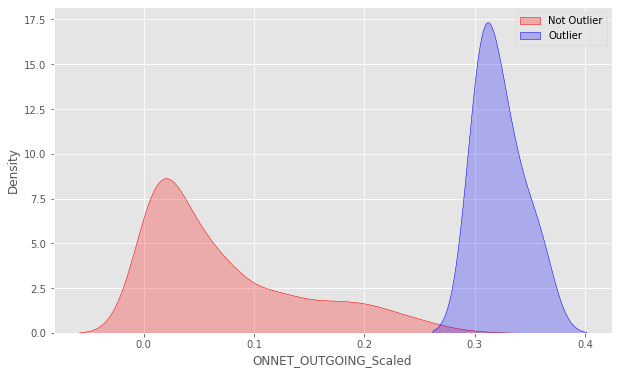

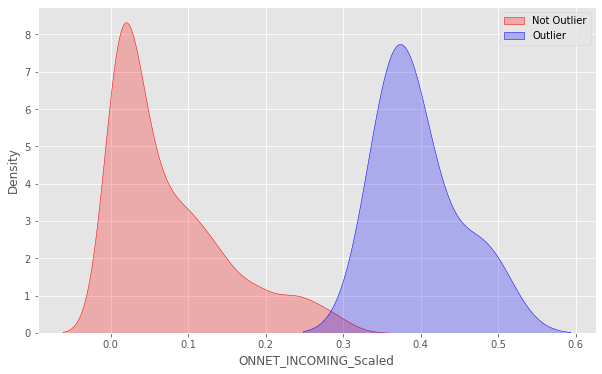

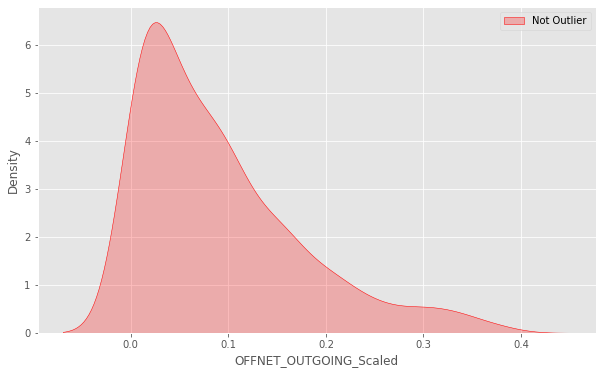

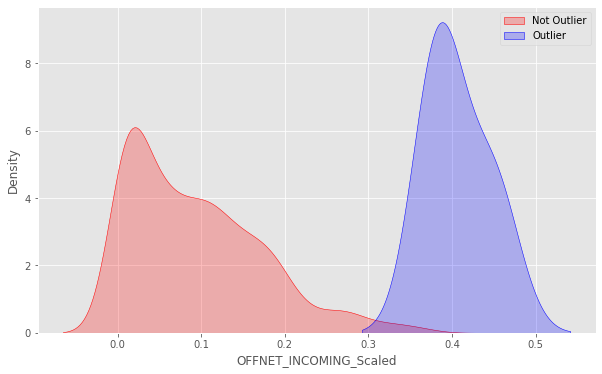

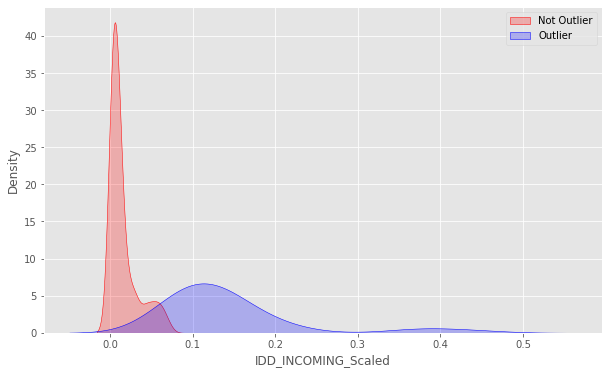

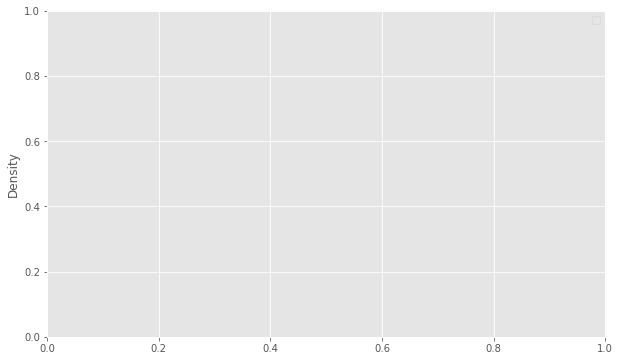

In [17]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_2[scaled_cols[i]][(cluster_2[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_2[scaled_cols[i]][(cluster_2[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [18]:
# Voice Outliers
cluster_2_out = cluster_2[(cluster_2["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_2["ONNET_INCOMING_Outlier"]=="YES") | (cluster_2["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_2["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_2["IDD_OUTGOING_Outlier"]=="YES") | (cluster_2["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

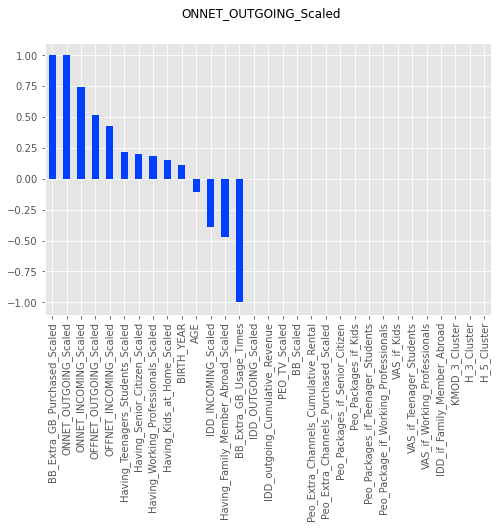

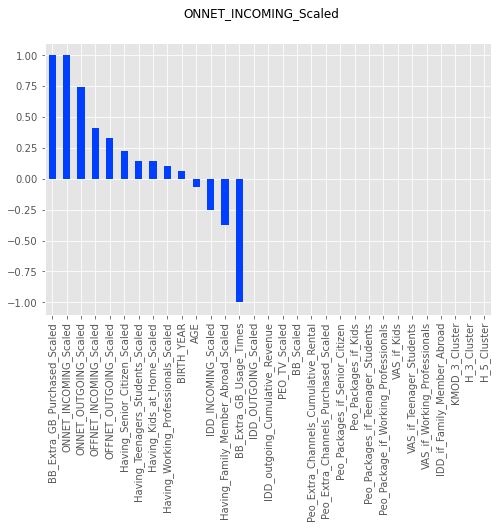

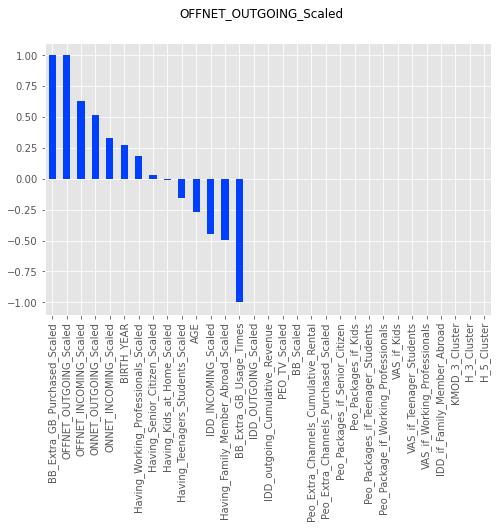

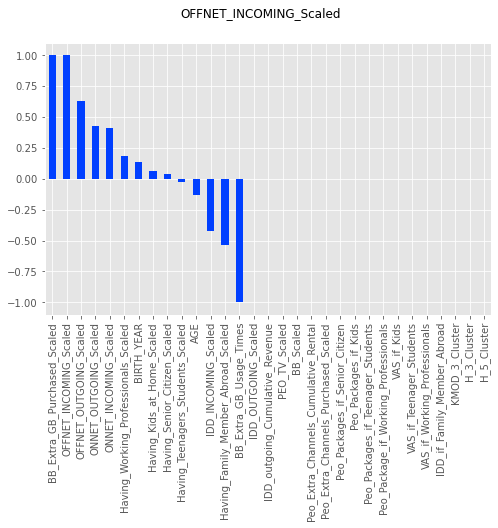

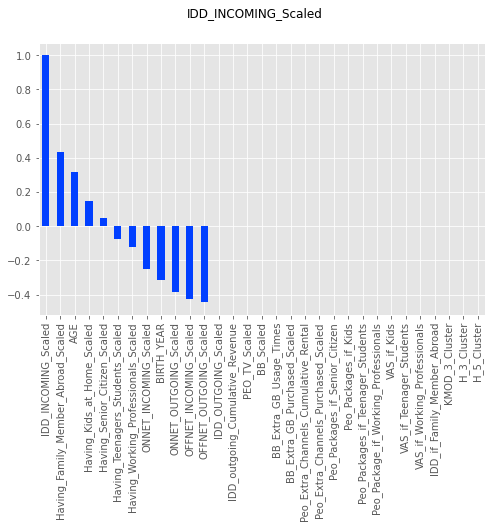

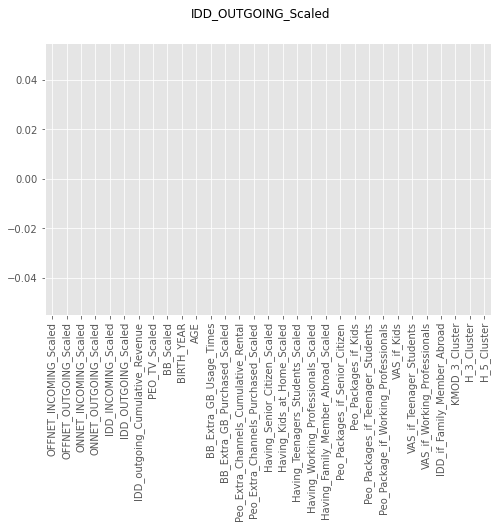

In [19]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_2_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [20]:
cluster_2_out_sub_df = pd.DataFrame([dict(cluster_2["Sub_Type"].value_counts()),dict(cluster_2_out["Sub_Type"].value_counts())])

In [21]:
cluster_2_out_sub_df

,TRIPLE_PLAY
0,591
1,49


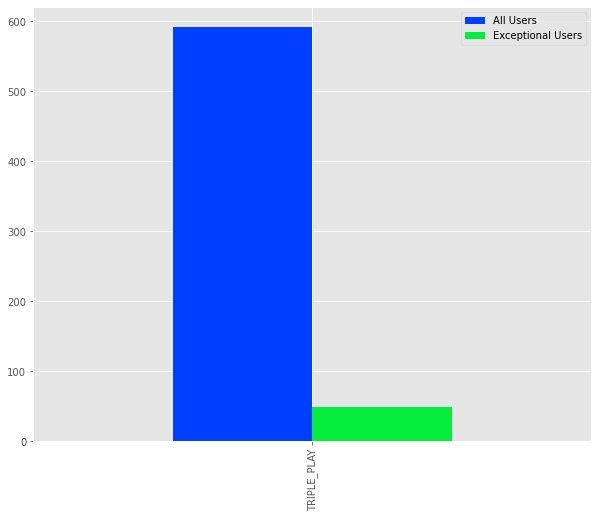

In [22]:
fig, ax = plt.subplots()
cluster_2_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

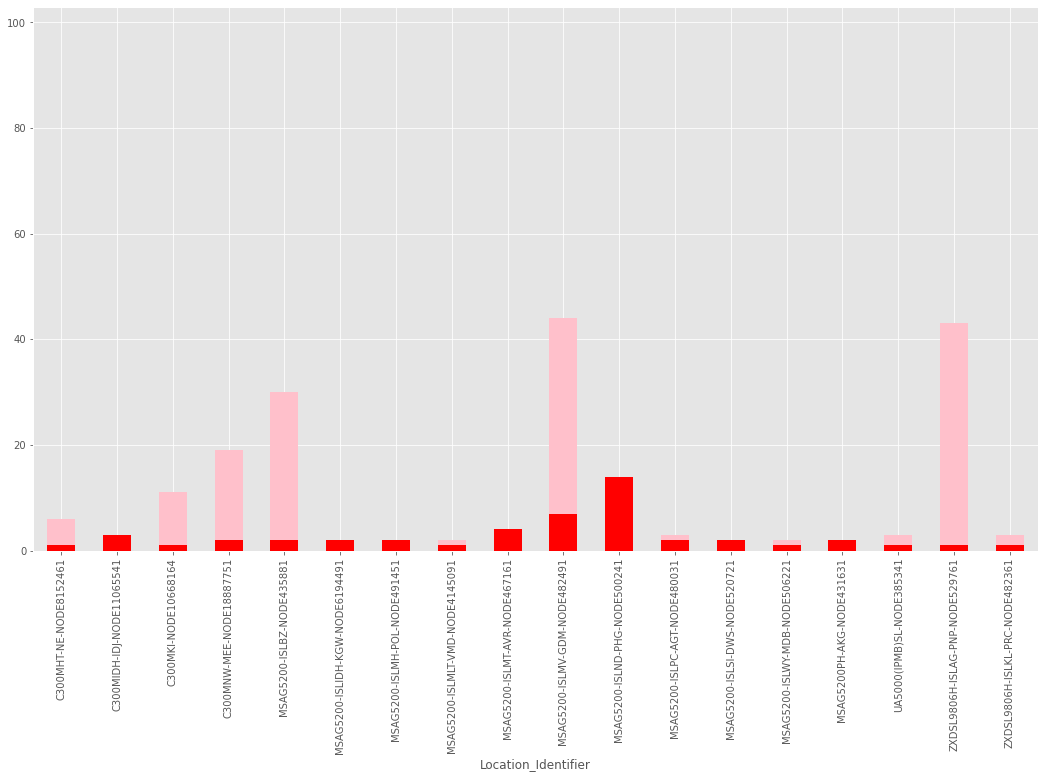

In [23]:
cluster_2_loc = cluster_2.groupby('Location_Identifier').count()["event_source.hash"]
cluster_2_out_loc = cluster_2_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_2_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

array([[<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Usage_Times'}>],
       [<AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Peo_Extra_Channels_Cumulative_Rental'}>,
        <AxesSubplot:title={'center':'Peo_Extra_Channels_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Hav

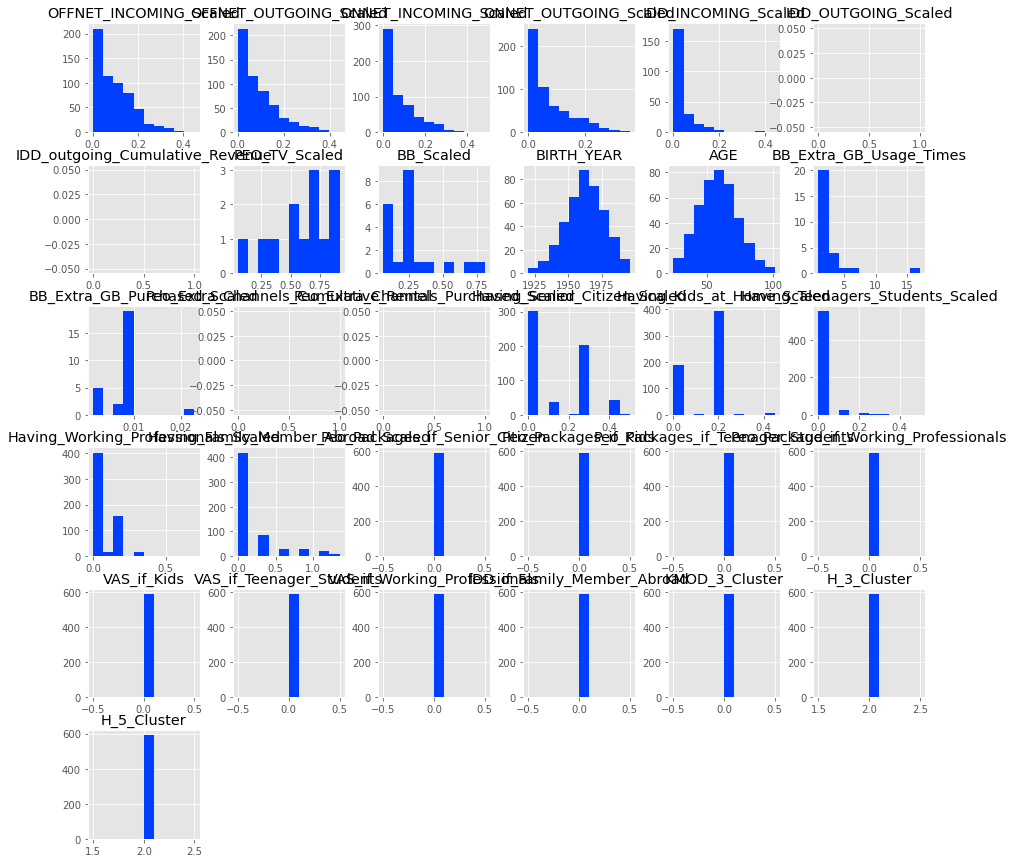

In [24]:
cluster_2.hist(figsize=(15,15))

### Subscription Type and Usage

In [25]:
cluster_2["Sub_Type"].value_counts()

TRIPLE_PLAY    591
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

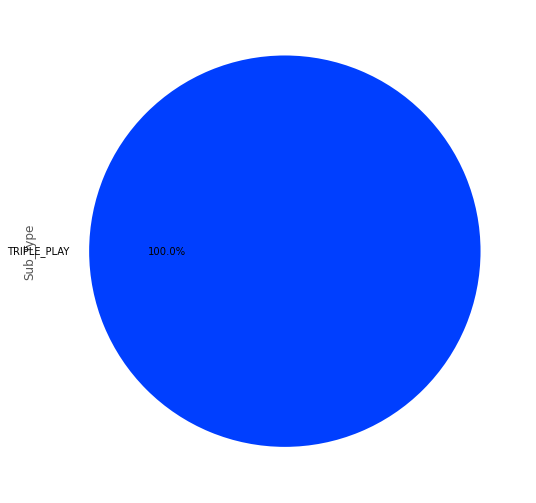

In [26]:
cluster_2["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [27]:
len(cluster_2[(cluster_2["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

582

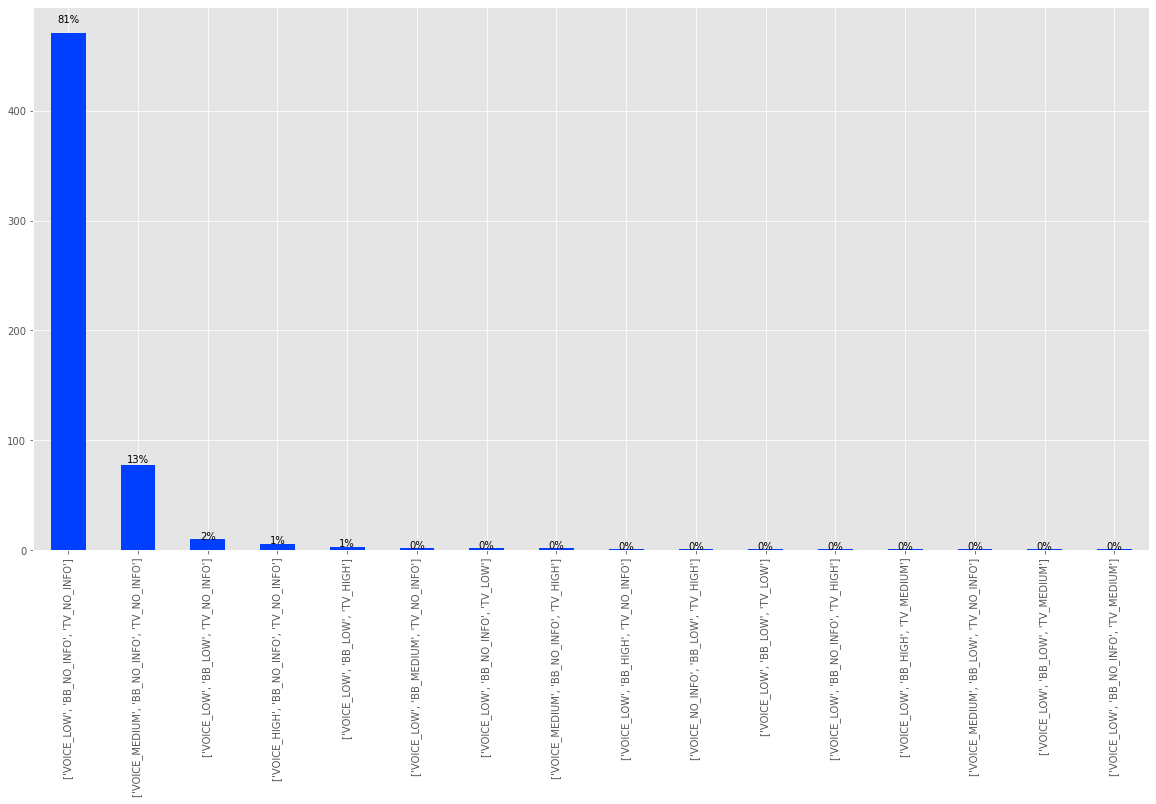

In [28]:
ax =cluster_2[(cluster_2["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [29]:
cluster_2["VOICE_Categorical"].value_counts()

LOW        494
MEDIUM      81
NO_INFO     10
HIGH         6
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

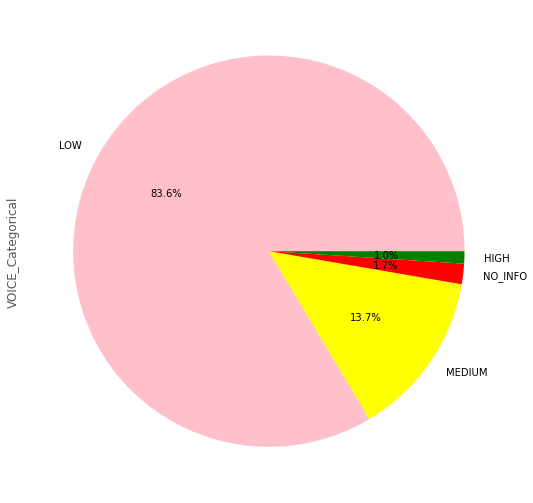

In [30]:
cluster_2["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','red','green'] )

### VAS Packages

In [31]:
count_dict = dict(cluster_2["VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

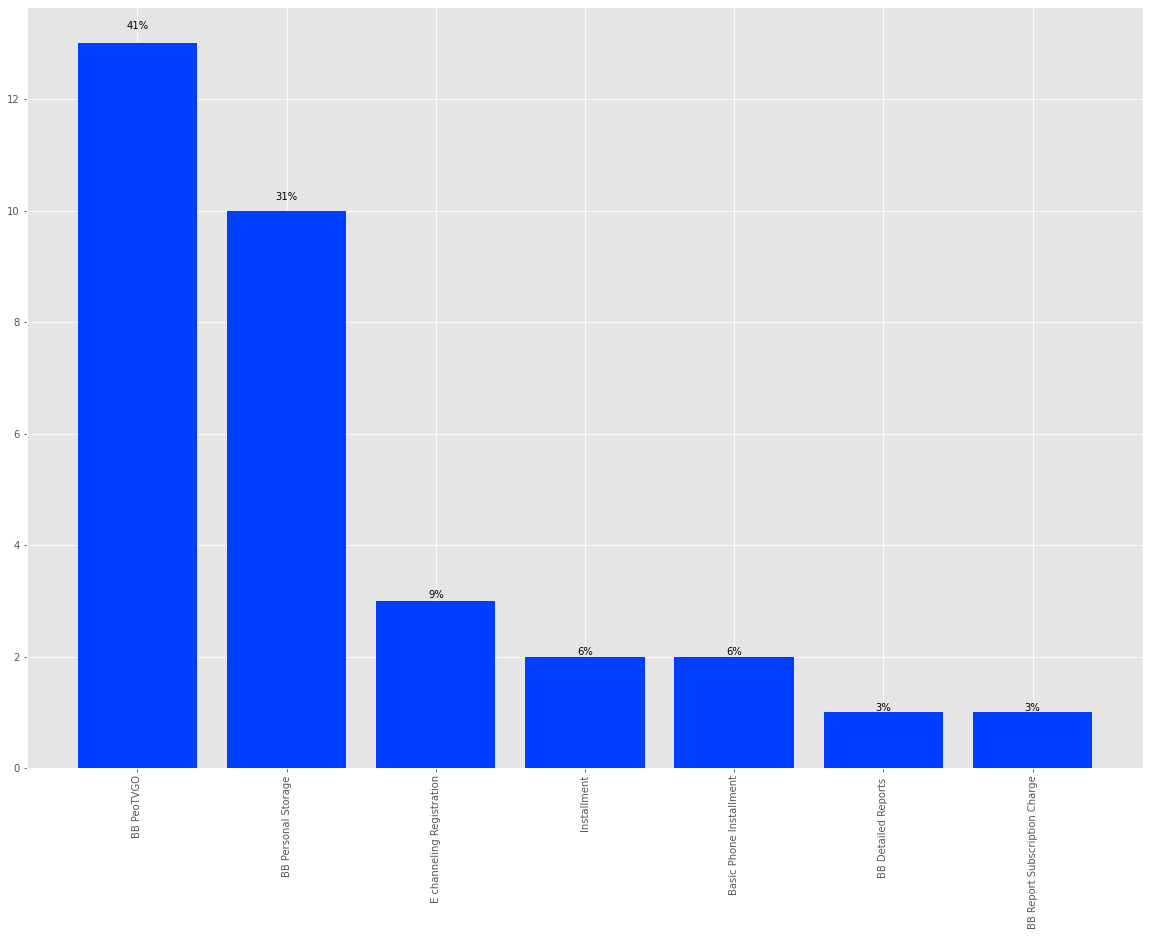

In [32]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [33]:
cluster_2["IDD_Overall_Categorical"].value_counts()

NO_INFO    365
LOW        226
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

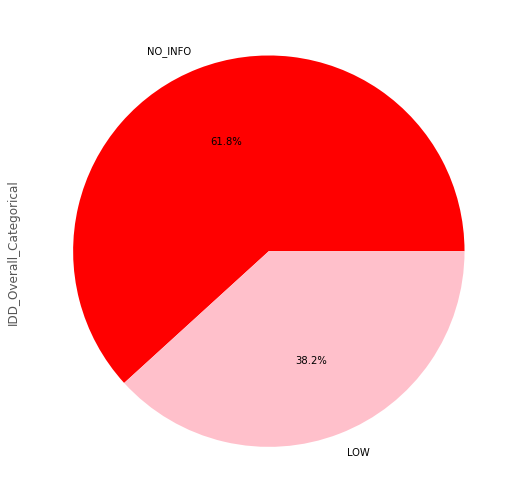

In [34]:
cluster_2["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green'] )

#### IDD Calling country analysis

In [41]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [42]:
cluster_2_idd_country_df = cluster_2[["ACCOUNT_NUM.hash","IDD_incoming_country"]]

In [43]:
cluster_2_idd_country_df["IDD_incoming_country"] = cluster_2_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-43-2b17a12cb9b9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
cluster_2_idd_country_df = cluster_2_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

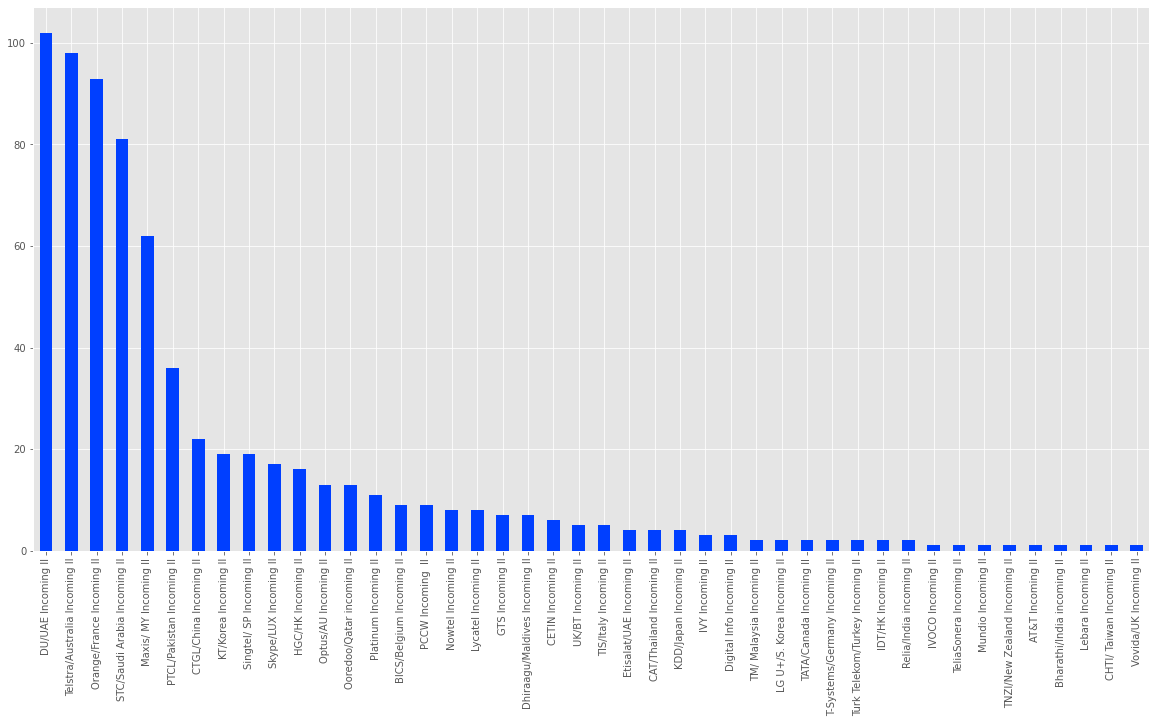

In [45]:
cluster_2_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [46]:
cluster_2_idd_out_country_df = cluster_2[["ACCOUNT_NUM.hash","IDD_outgoing_country"]]

In [47]:
cluster_2_idd_out_country_df["IDD_outgoing_country"] = cluster_2_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-47-c45a5d96e560>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
cluster_2_idd_out_country_df = cluster_2_idd_out_country_df.explode("IDD_outgoing_country")

In [49]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [50]:
cluster_2_idd_out_country_df["IDD_outgoing_country"] = cluster_2_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

In [54]:
cluster_2_idd_out_country_df["IDD_outgoing_country"].value_counts()

Series([], Name: IDD_outgoing_country, dtype: int64)

#### IDD Rental anlysis

In [52]:
cluster_2["IDD_outgoing_Cumulative_Revenue"].value_counts()

Series([], Name: IDD_outgoing_Cumulative_Revenue, dtype: int64)

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [55]:
cluster_2["PEO_TV_Categorical"].value_counts()

NO_INFO    578
HIGH         7
LOW          3
MEDIUM       3
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 2

<AxesSubplot:ylabel='PEO_TV_Categorical'>

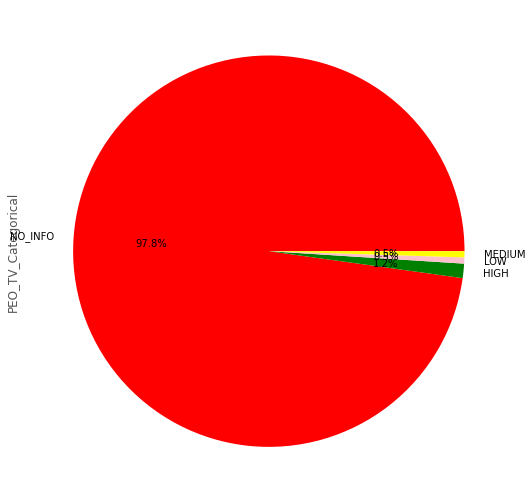

In [57]:
cluster_2_peo = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY")]
cluster_2_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','green','pink','yellow','red','orange'])

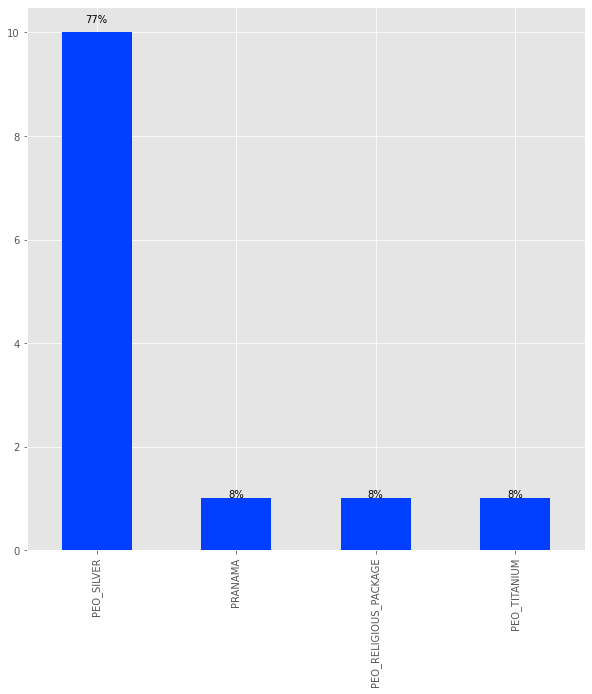

In [58]:
ax =cluster_2_peo[(cluster_2_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [60]:
cluster_2["BB_Categorical"].value_counts()

NO_INFO    570
LOW         17
HIGH         2
MEDIUM       2
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 2

<AxesSubplot:ylabel='BB_Categorical'>

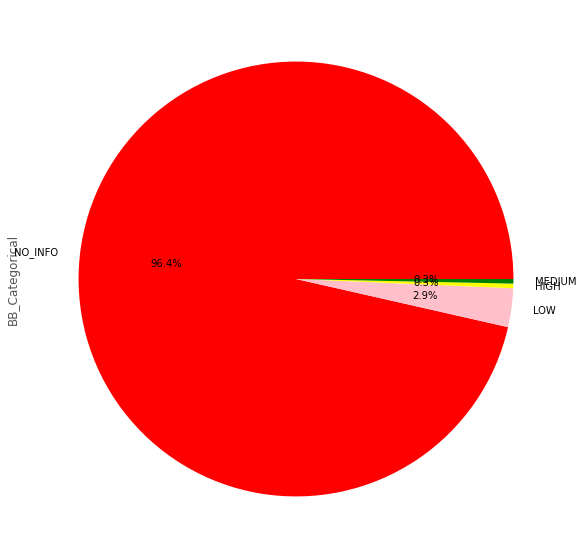

In [61]:
cluster_2_bb = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY")]
cluster_2_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [70]:
extra_gb_freq_users = cluster_2[(cluster_2["BB_Extra_GB_Usage_Times"]>10.0)]

In [71]:
extra_gb_mostly_used_users = extra_gb_freq_users["ACCOUNT_NUM.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

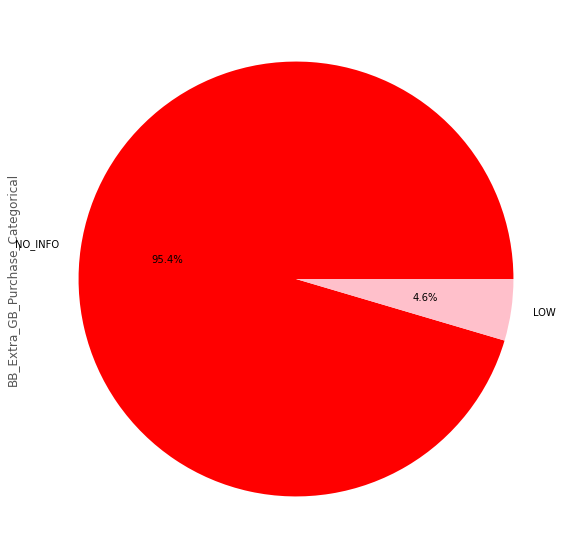

In [72]:
cluster_2["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '6720a48f417f94f01c81e5eec262b7bc')]

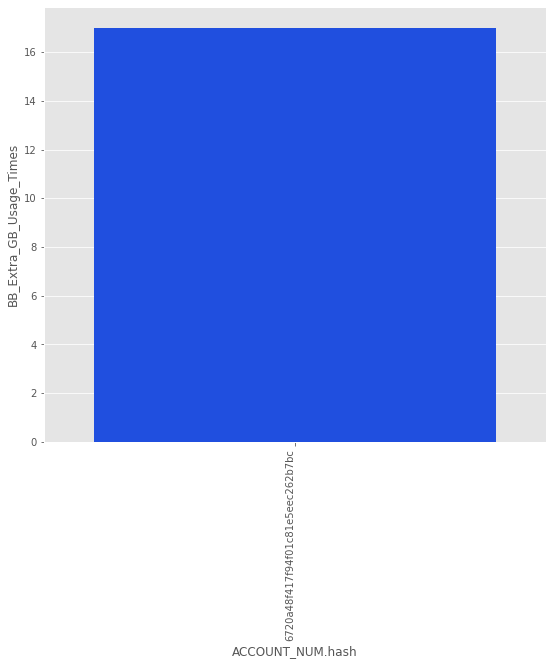

In [73]:
plt.figure(figsize=(9,8))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='ACCOUNT_NUM.hash', y='BB_Extra_GB_Usage_Times')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

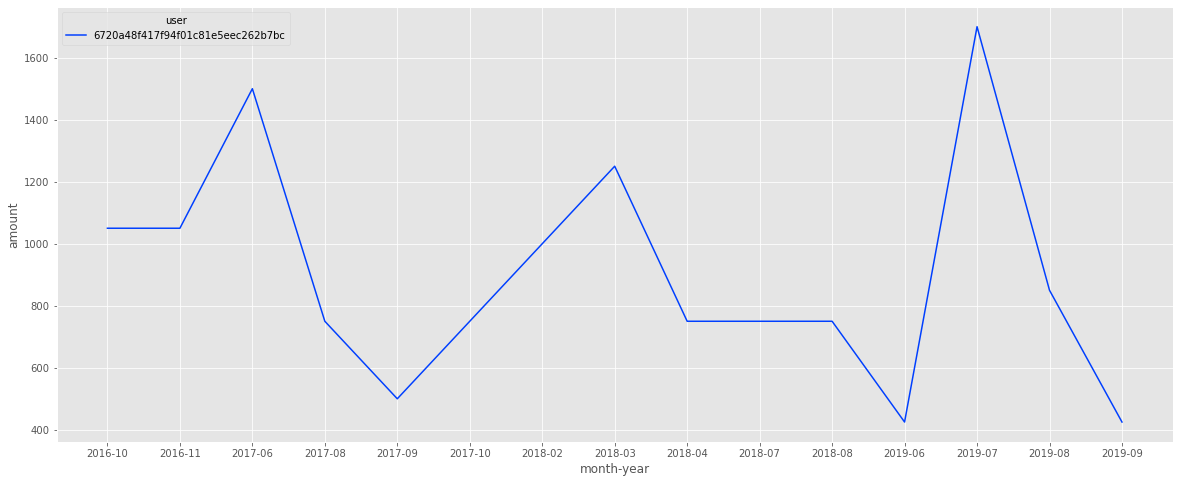

In [75]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["ACCOUNT_NUM.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

## User Location

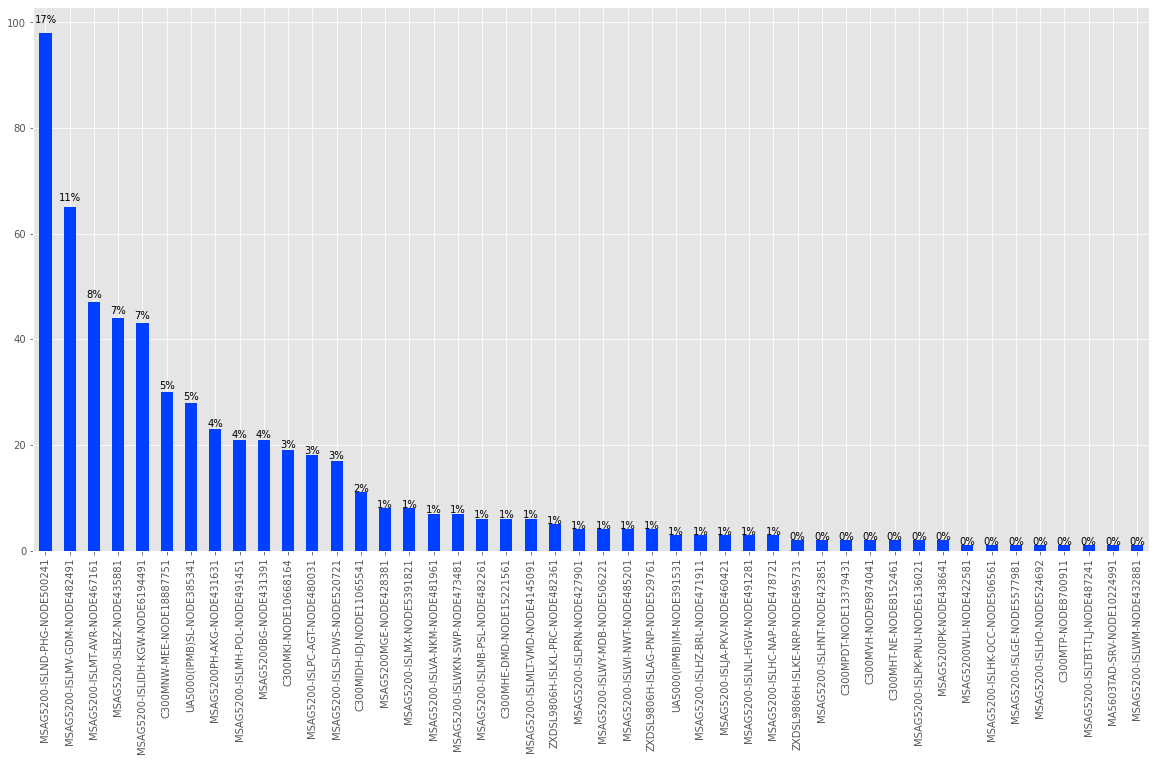

In [76]:
ax =cluster_2["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

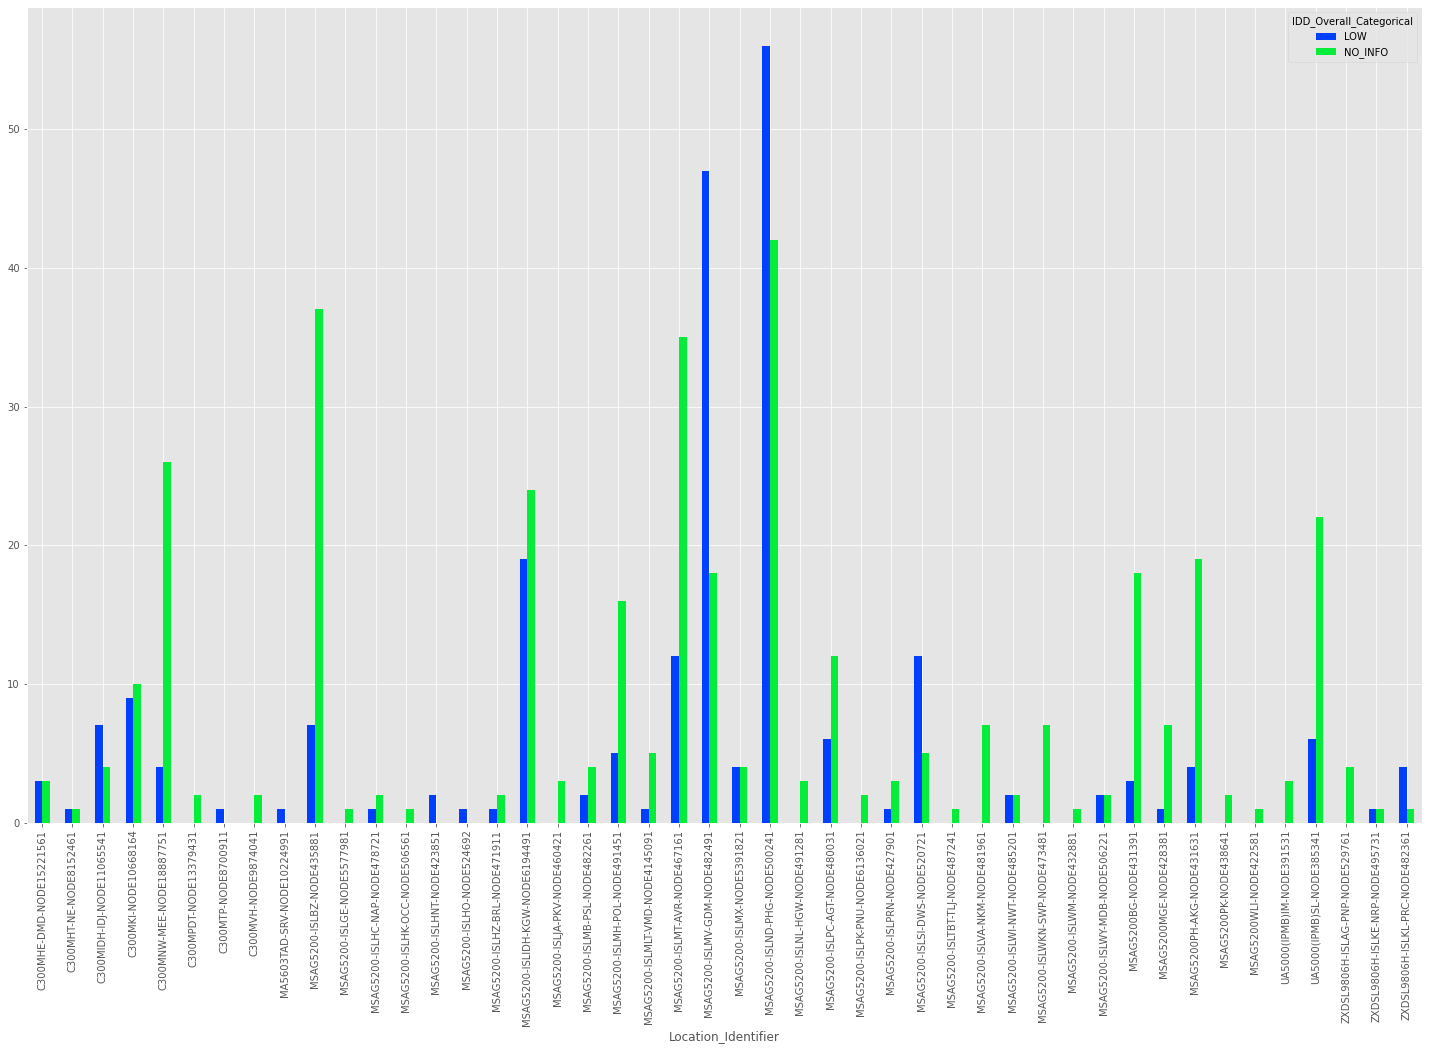

In [77]:
#ax =cluster_2[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_2[(cluster_2["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-78-ca8902d7866f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(1, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(2, 0, 'MSAG5200-ISLMH-POL-NODE491451'),
 Text(3, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(4, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(5, 0, 'MSAG5200-ISLMT-AVR-NODE467161'),
 Text(6, 0, 'C300MVH-NODE9874041'),
 Text(7, 0, 'C300MKI-NODE10668164'),
 Text(8, 0, 'MSAG5200BG-NODE431391'),
 Text(9, 0, 'ZXDSL9806H-ISLKL-PRC-NODE482361'),
 Text(10, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(11, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(12, 0, 'MSAG5200-ISLBZ-NODE435881'),
 Text(13, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(14, 0, 'MSAG5200PH-AKG-NODE431631'),
 Text(15, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(16, 0, 'MSAG5200MGE-NODE428381'),
 Text(17, 0, 'C300MNW-MEE-NODE18887751'),
 Text(18, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(19, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(20, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(21, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(22, 0, 'MSAG5200-ISLHZ-BR

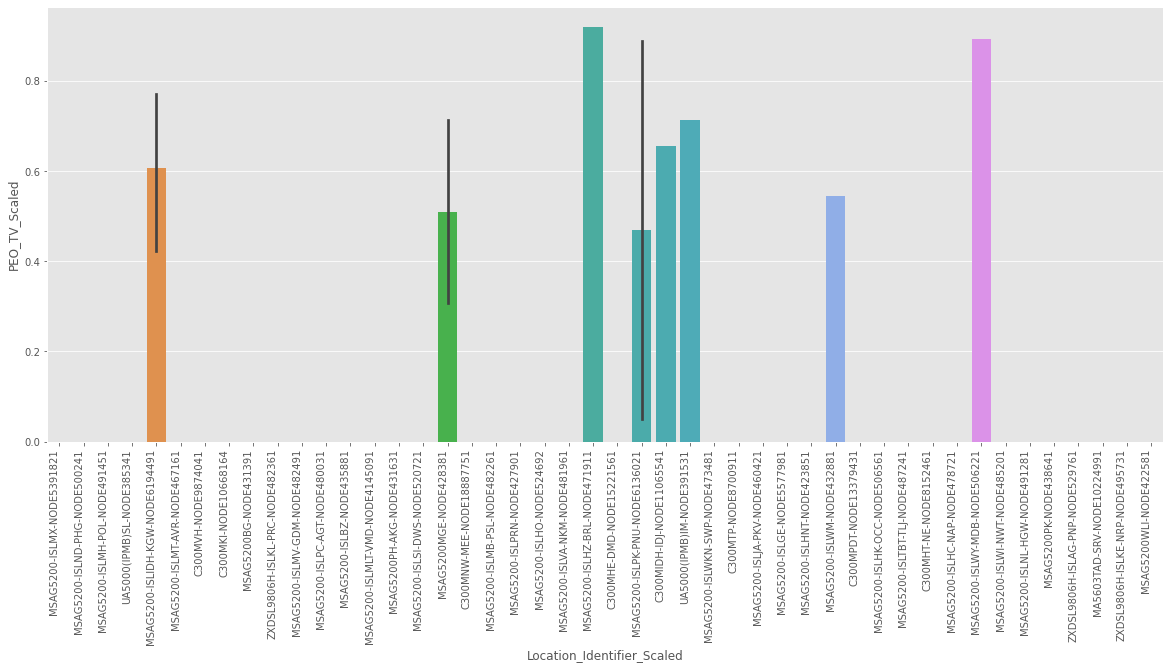

In [78]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_2[["ACCOUNT_NUM.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [79]:
location_arr = cluster_2["Location_Identifier"].unique()

<ipython-input-80-4090007e361e>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

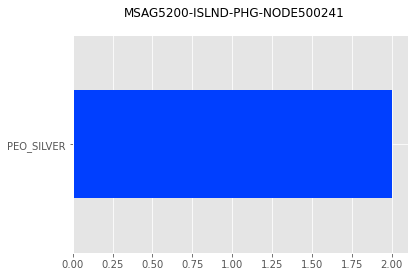

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

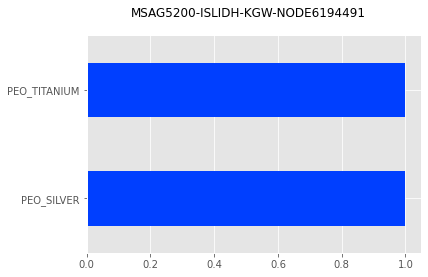

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

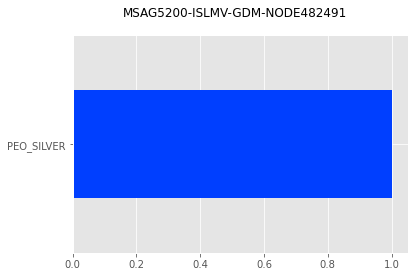

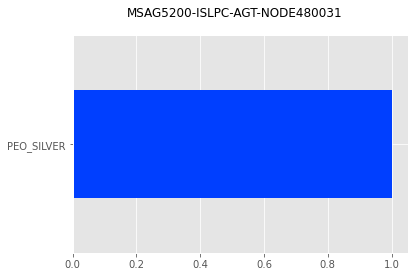

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

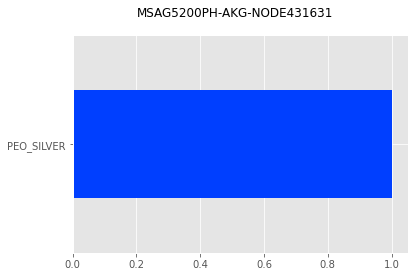

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

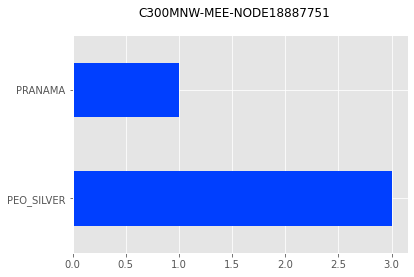

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

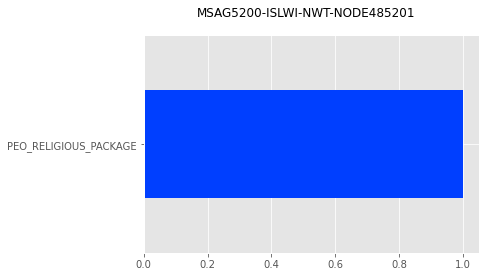

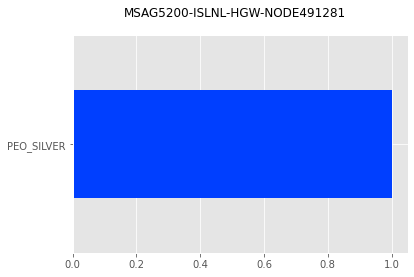

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [80]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of VAS Packages among Locations

<ipython-input-81-168b20a31256>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

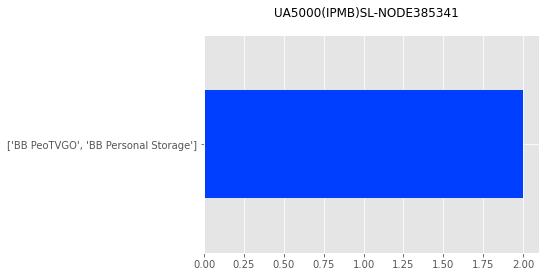

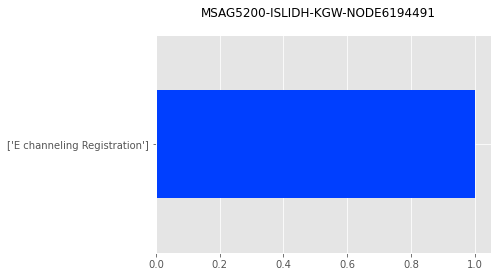

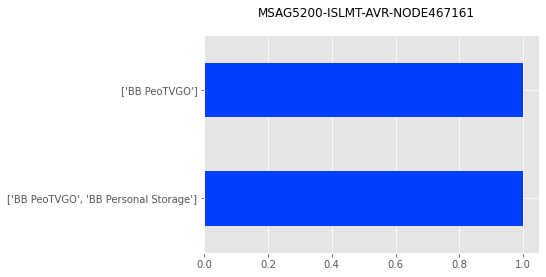

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

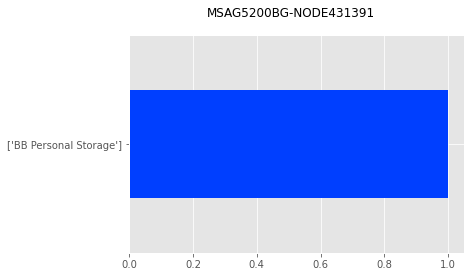

<Figure size 432x288 with 0 Axes>

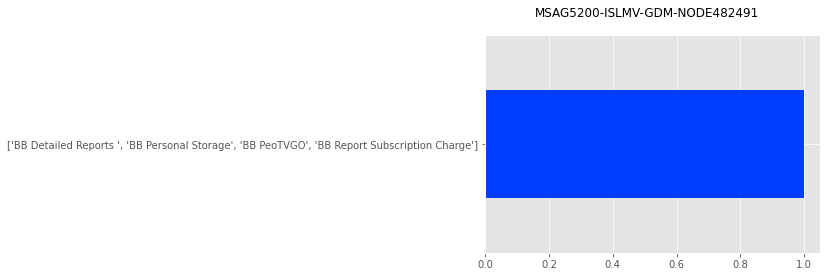

<Figure size 432x288 with 0 Axes>

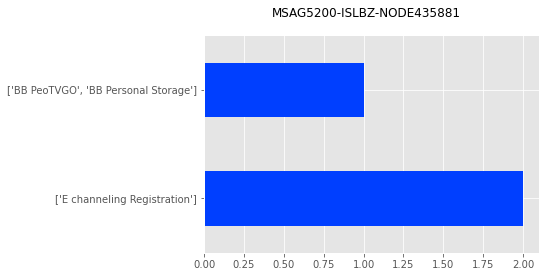

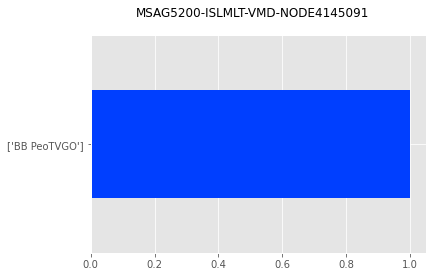

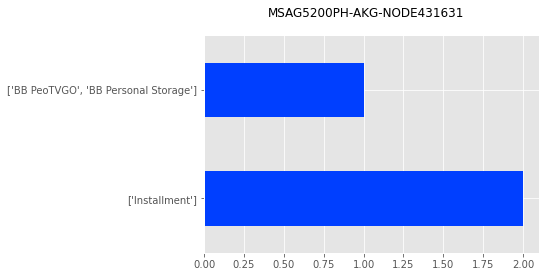

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

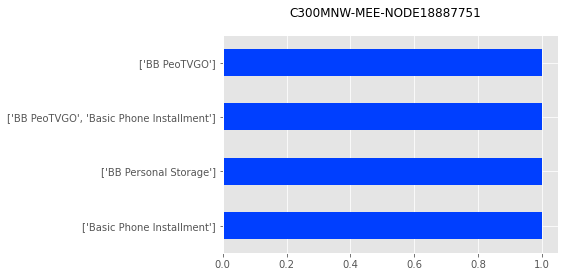

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

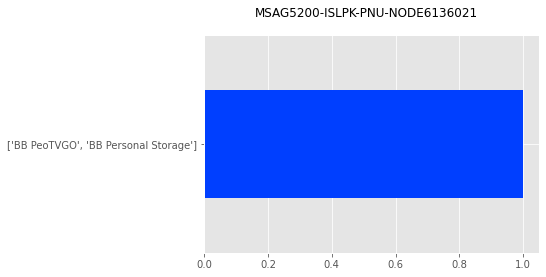

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

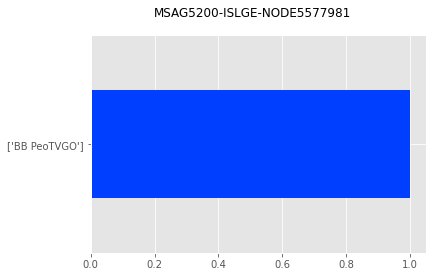

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

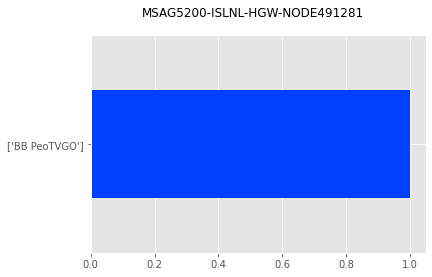

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

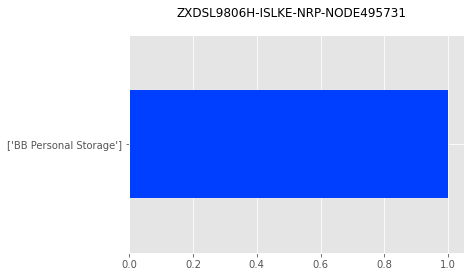

<Figure size 432x288 with 0 Axes>

In [81]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["VAS_Package"].value_counts()) > 0):
        user_loc_df["VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

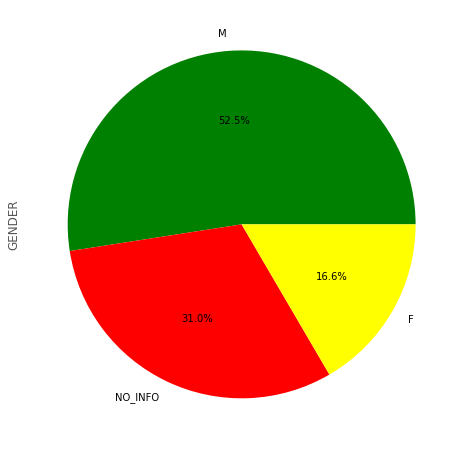

In [83]:
cluster_2["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','red','yellow'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

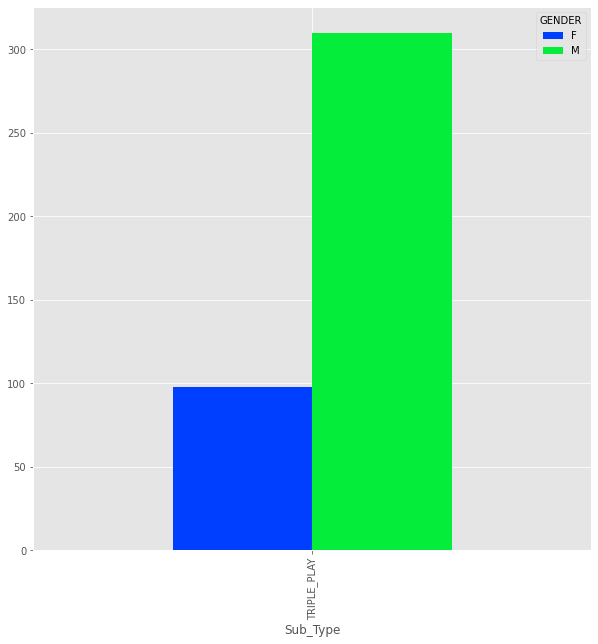

In [84]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

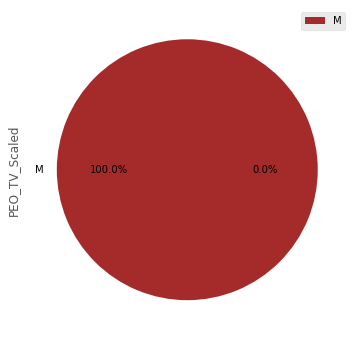

In [85]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

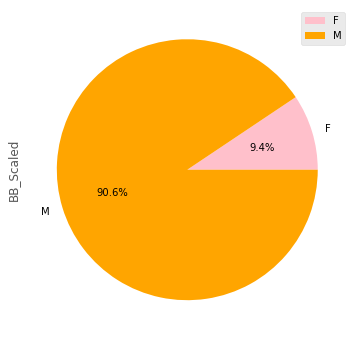

In [86]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

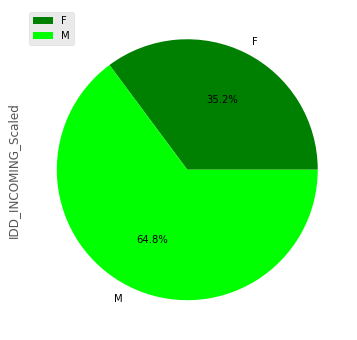

In [87]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

## AGE Analysis

In [89]:
cluster_2["AGE"].describe()

count    408.000000
mean      58.850490
std       14.710965
min       25.000000
25%       48.000000
50%       58.000000
75%       68.250000
max      101.000000
Name: AGE, dtype: float64

In [90]:
bins = [0, 30,55,65,85,110]
cluster_2['AGE_Groups'] = pd.cut(cluster_2['AGE'], bins)

<ipython-input-90-b41f0025cf00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

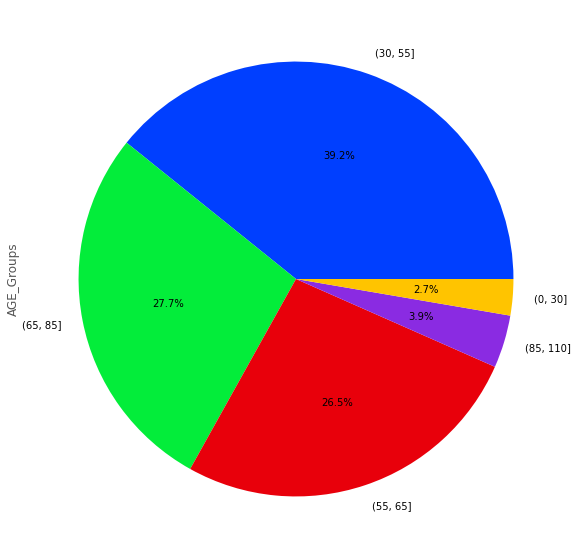

In [91]:
cluster_2["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

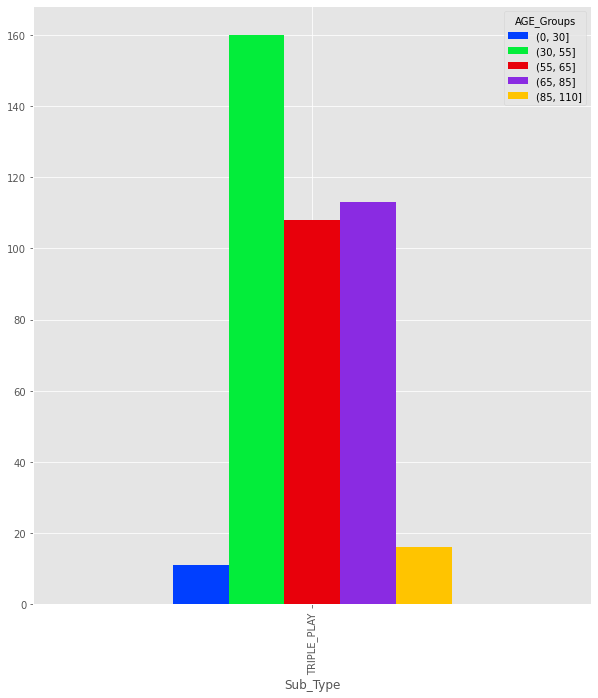

In [92]:
cluster_2.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

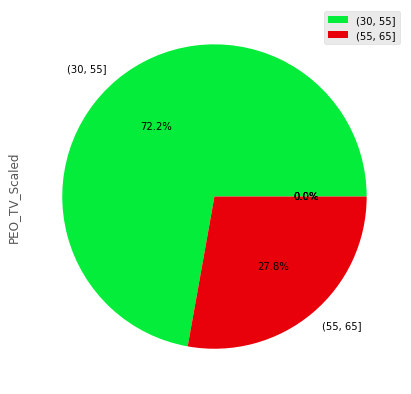

In [93]:
cluster_2[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

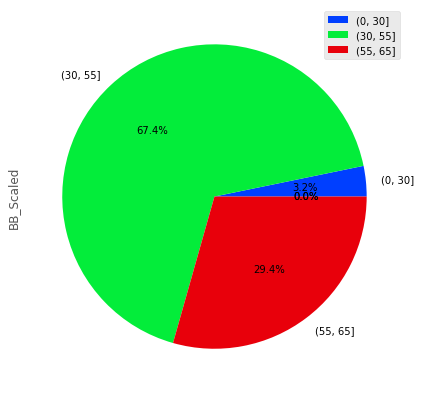

In [94]:
cluster_2[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

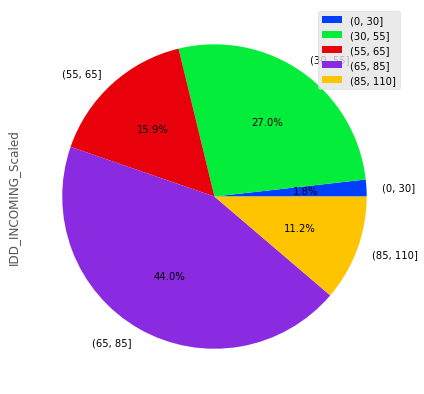

In [95]:
cluster_2[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

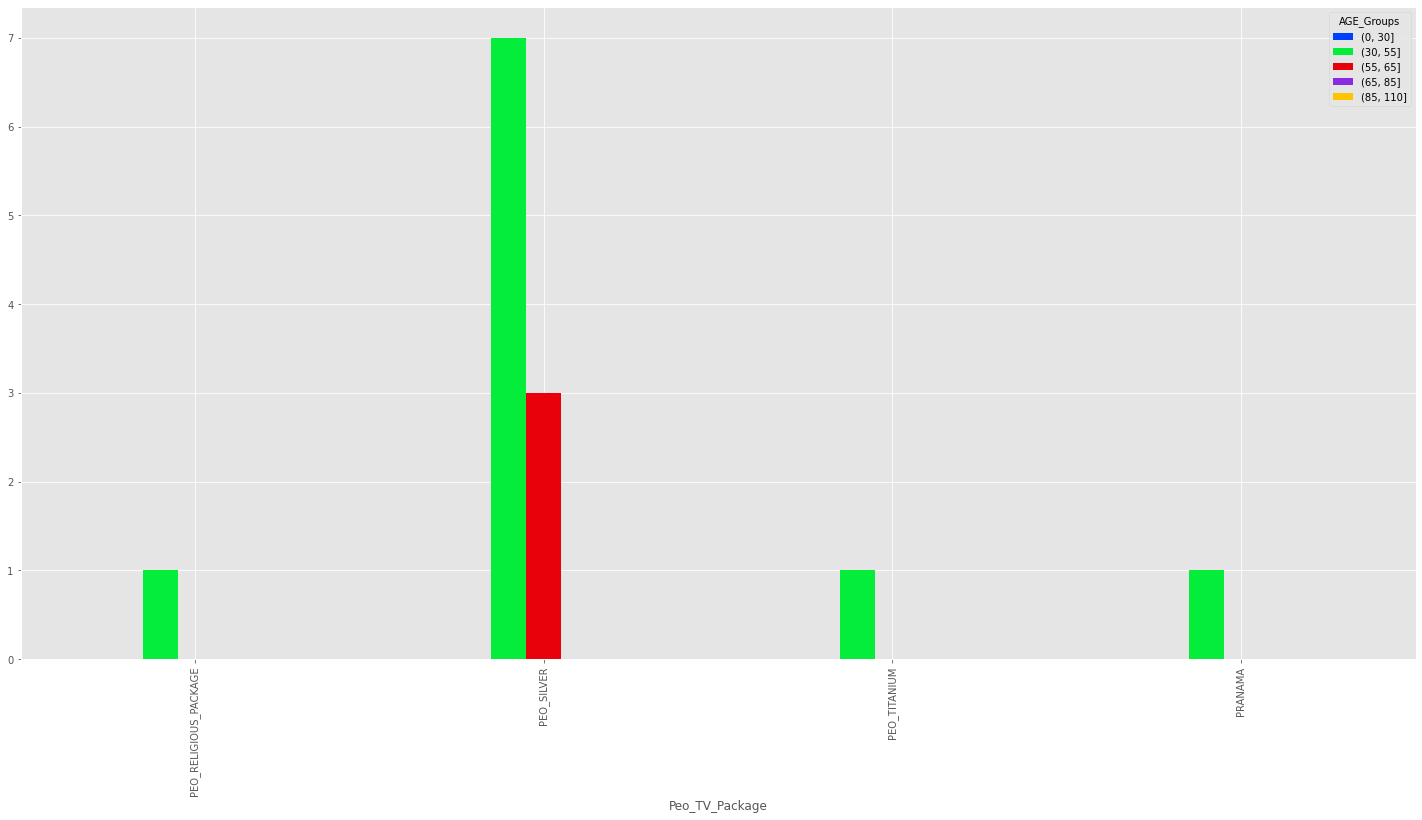

In [96]:
cluster_2[(cluster_2["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [97]:
cluster_2["Having_Insurance"].value_counts()

NO_INFO    591
Name: Having_Insurance, dtype: int64

#### Having Senior citizens

In [99]:
cluster_2["Having_Senior_Citizen"].value_counts()

NO_INFO    588
YES          3
Name: Having_Senior_Citizen, dtype: int64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

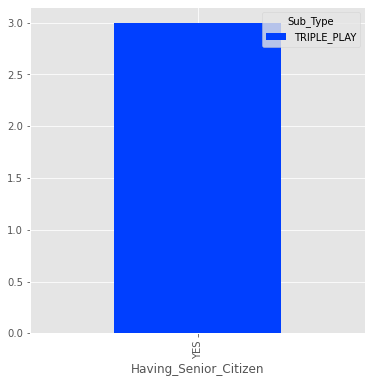

In [100]:
cluster_2[(cluster_2["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

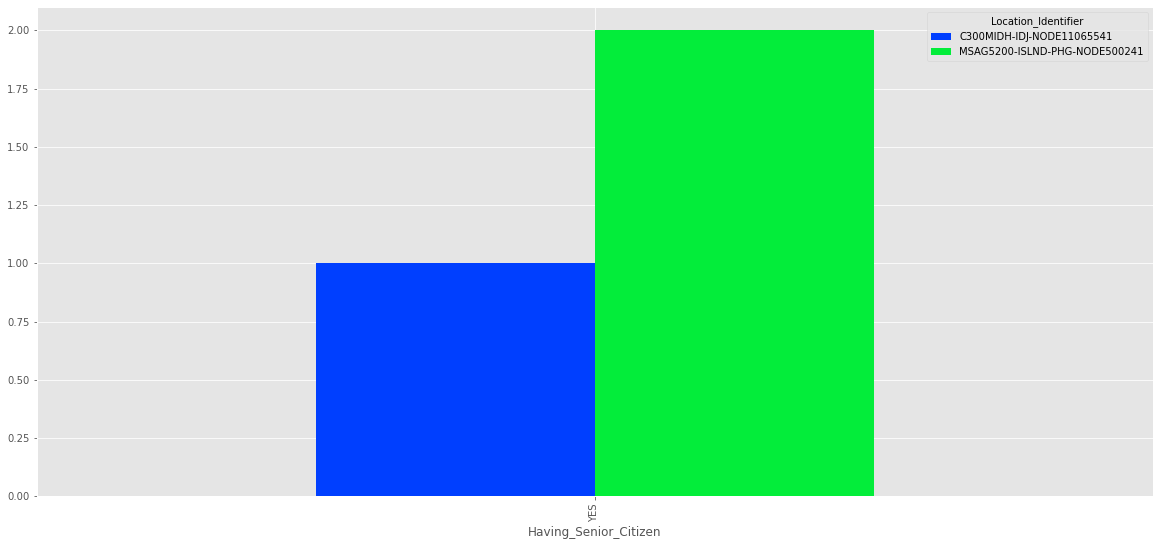

In [101]:
cluster_2[(cluster_2["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [102]:
cluster_2["Having_Family_Member_Abroad"].value_counts()

NO_INFO    505
YES         86
Name: Having_Family_Member_Abroad, dtype: int64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

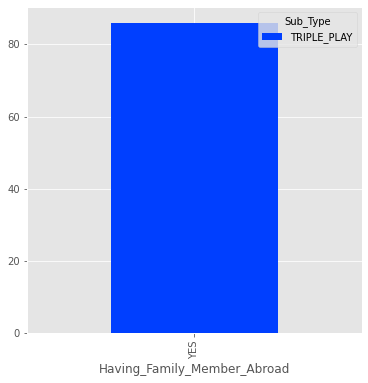

In [103]:
cluster_2[(cluster_2["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

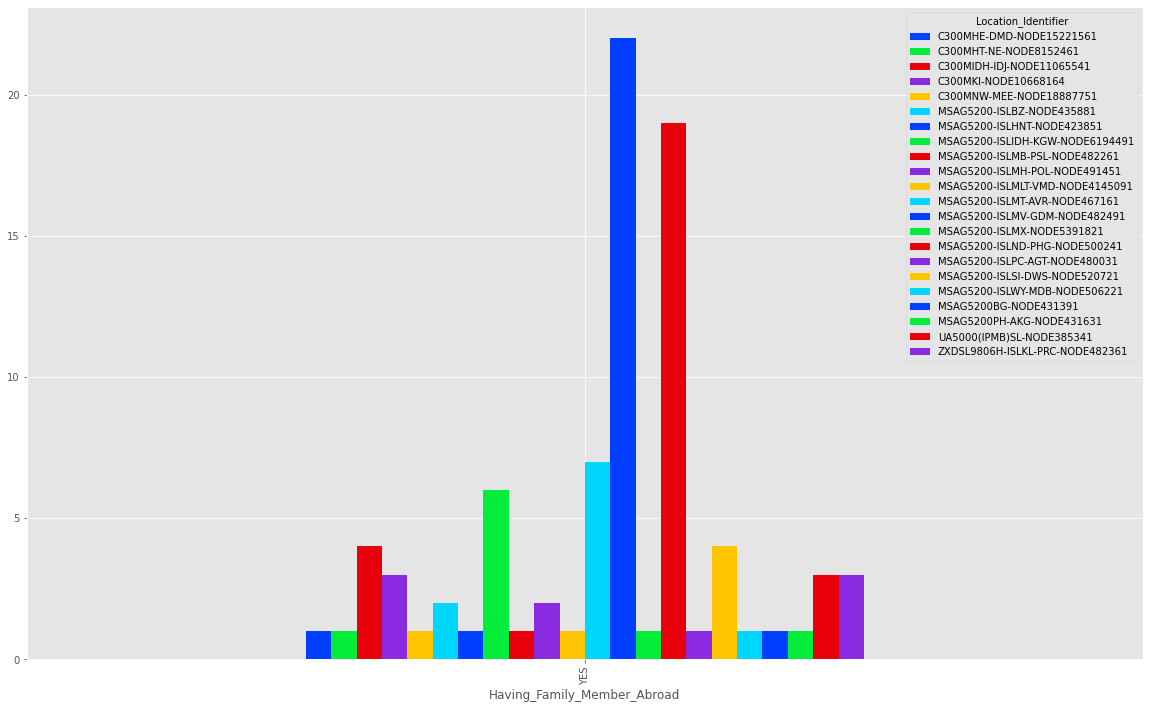

In [104]:
cluster_2[(cluster_2["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [105]:
cluster_2["Having_Working_Professionals"].value_counts()

NO_INFO    590
YES          1
Name: Having_Working_Professionals, dtype: int64

<AxesSubplot:xlabel='Having_Working_Professionals'>

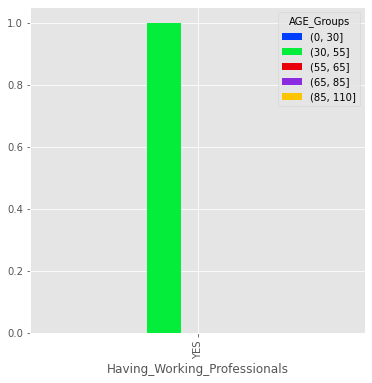

In [106]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

#### Having Teenagers Students

In [109]:
cluster_2["Having_Teenagers_Students"].value_counts()

NO_INFO    590
YES          1
Name: Having_Teenagers_Students, dtype: int64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

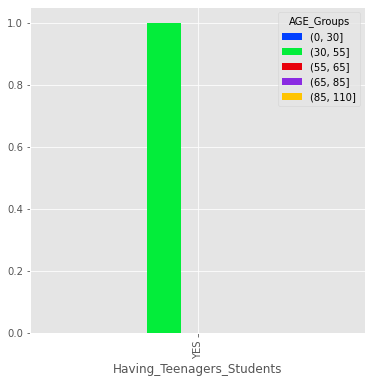

In [110]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

#### Having a Tamil customer

In [111]:
cluster_2["Tamil_Customer"].value_counts()

NO_INFO    591
Name: Tamil_Customer, dtype: int64

#### Having Kids at Home

In [112]:
cluster_2["Having_Kids_at_Home"].value_counts()

NO_INFO    591
Name: Having_Kids_at_Home, dtype: int64

### Identifying factors for recommending Packages for Cluster 2

#### Feasible locations to offer PeoTV

In [115]:
cluster_2_peo_loc = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY") | (cluster_2["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

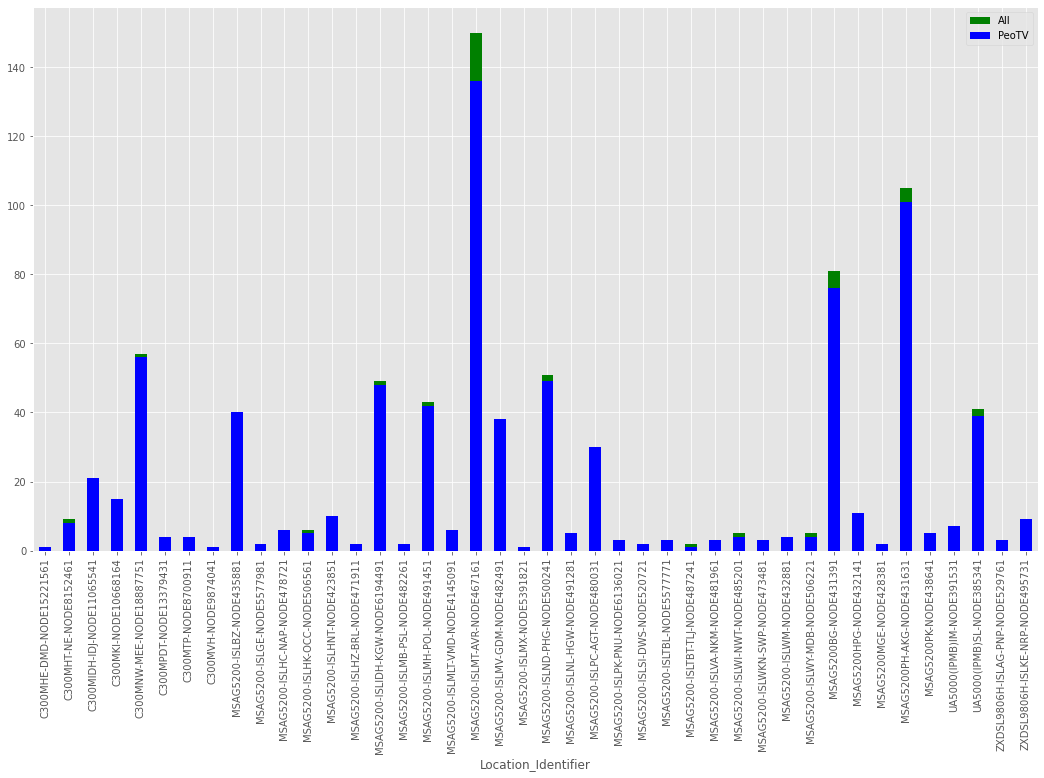

In [116]:
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [117]:
loc_precentage=(cluster_2_peo_loc/cluster_2_loc)*100

In [118]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561           100.000000
C300MHT-NE-NODE8152461              88.888889
C300MIDH-IDJ-NODE11065541          100.000000
C300MKI-NODE10668164               100.000000
C300MNW-MEE-NODE18887751            98.245614
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
C300MVH-NODE9874041                100.000000
MSAG5200-ISLBZ-NODE435881          100.000000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       83.333333
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     97.959184
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       97.674419
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       90.666667
MSAG5200-ISLMV-GDM-NODE482491      100.000000
MSAG5200-ISLMX-NODE5391821         100.000000
MSAG5200-ISLND

#### Feasible locations to offer Broadband

In [119]:
cluster_2_bb_loc = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY") | (cluster_2["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

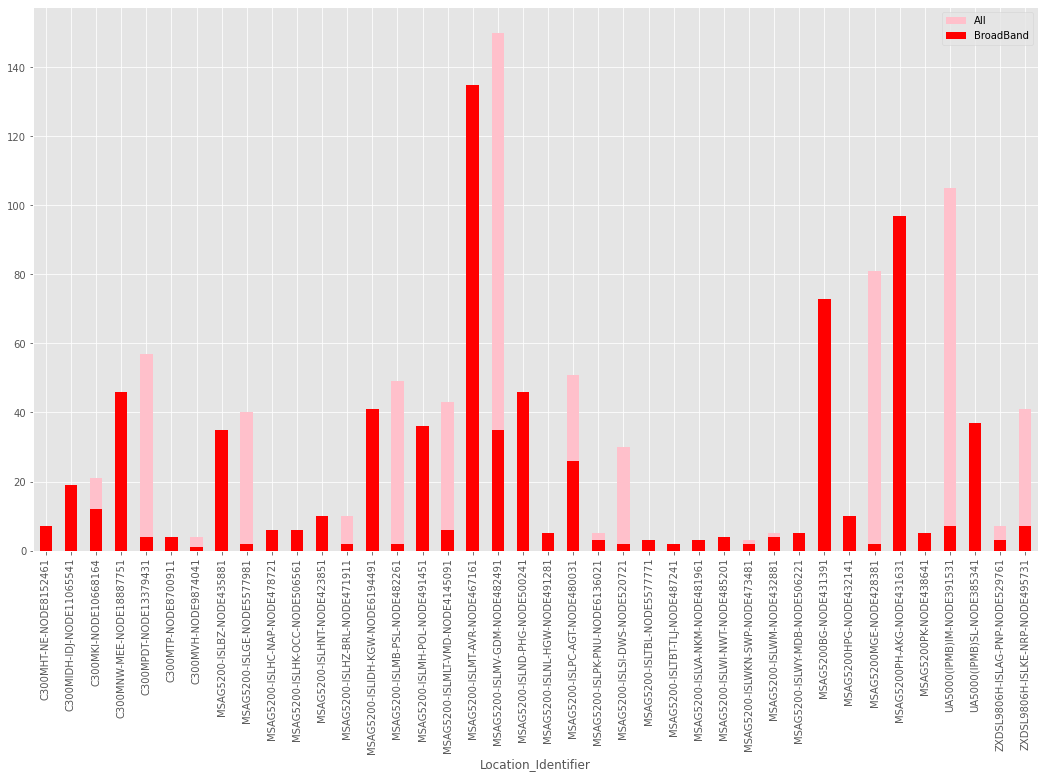

In [120]:
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [121]:
loc_precentage=(cluster_2_bb_loc/cluster_2_loc)*100

In [122]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              77.777778
C300MIDH-IDJ-NODE11065541           90.476190
C300MKI-NODE10668164                80.000000
C300MNW-MEE-NODE18887751            80.701754
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
C300MVH-NODE9874041                100.000000
MSAG5200-ISLBZ-NODE435881           87.500000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     83.673469
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       83.720930
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       90.000000
MSAG5200-ISLMV-GDM-NODE482491       92.105263
MSAG5200-ISLND-PHG-NODE500241       90.196078
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPC

## Cluster 2- Findings